# Project: Product Range Analysis
### by Ferdinand Paul

## The Goal:
The main objective in analyzing the present data set is to determine the turnover by season. To determine which seasons have the most growth and at what time the turnover stagnates or decreases. The next step is to determine which products perform best at which times in order to find out when the marketing department can promote which product groups most effectively.

## The Dataset:

- InvoiceNo: The invoice number of the purchase
- StockCode: The stock code of the product
- Description: The name and Description of the product
- Quantity: The amount of products sold per purchase
- InvoiceDate: The date of the purchase
- UnitPrice: The price of the product
- CustomerID: The ID of the single customer. If the customer is not registrated, its value is nan

# Step 1 | Check the frame:

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from mlxtend.frequent_patterns import apriori, association_rules 

import nltk 
from nltk.tokenize import word_tokenize
from collections import Counter 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ferdinandpaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ferdinandpaul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ferdinandpaul/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ferdinandpaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [327]:
# create dataframe and change datatypes from columns 'InvoiceDate', 'CustomerID'
df = pd.read_csv('ecommerce_dataset_us.csv', on_bad_lines='skip', sep='\t')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('str')

## First Look

In [328]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047.0


In [329]:
df.shape

(541909, 7)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [331]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [332]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
dtype: int64

In [333]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
dtype: int64

In [334]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
dtype: int64

In [335]:
df.duplicated().sum()

5268

## Data Preparation & Data Cleaning 

## Investigate Duplicates 

In [336]:
# get percent of duplicates in dataframe
df.duplicated().sum()/len(df)*100

0.9721189350979592

In [337]:
# drop duplicates in dataframe
df = df.drop_duplicates().reset_index(drop=True)

In [338]:
# check if all duplicates are deleted
df.duplicated().sum()/len(df)*100

0.0

## Investigate Missing Values

In [339]:
# create variable with percent of missing values
percent_missing = df.isnull().sum() * 100 / len(df)

In [340]:
percent_missing

InvoiceNo      0.000000
StockCode      0.000000
Description    0.270945
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
dtype: float64

In [341]:
# drop missing values in column 'Description'
df.dropna(subset=['Description'], inplace=True)

In [342]:
# check if all missing values are deleted
df['Description'].isnull().sum()/len(df)*100

0.0

In [343]:
# added after found 'nan' as string in later investigations
df[df['CustomerID'] == 'nan']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,nan
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,nan
1409,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,nan
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,nan
1411,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,nan
...,...,...,...,...,...,...,...
536275,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,nan
536276,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,nan
536277,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,nan
536278,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,nan


In [344]:
# replace all string nan with numpy nan 
df = df.replace('nan', np.nan)

In [345]:
df[df['CustomerID'] == 'nan']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [346]:
# get all nan's
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
dtype: int64

In [347]:
# get percent of all nan's
df.isna().sum() * 100 / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.960061
dtype: float64

## Investigate Negative Values

In [348]:
# find all negative values in column 'Quantity'
negval_quan = df[df['Quantity'] < 0]
negval_quan.shape

(9725, 7)

In [349]:
# calculate the ratio between the original dataframe and the missing values in percent
len(negval_quan)/len(df)*100

1.8171218658151262

In [350]:
# drop all rows in column 'Quantity' with negative Values
df.drop(df[df.Quantity < 0].index, inplace=True)

In [351]:
# check if all rows are deleted
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [352]:
# dfind all negative values in column 'UnitPrice'
negval_unit = df[df['UnitPrice'] < 0]

In [353]:
negval_unit

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
297646,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
297647,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


In [354]:
# drop all rows in column 'UnitPrice' with negative Values
df.drop(df[df.UnitPrice < 0].index, inplace=True)

In [355]:
# check if all rows are deleted
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [356]:
# delete all rows in column 'StockCode' that contains letters
df = df[df['StockCode'].str.contains(r'[0-9]')]

## Conclusion

- 27 % of the 'Description' column are NaN values
- 10 % of the Dataset are duplicates
- 24 % of the 'CustomerID' column are NaN values
- 1,8 % of the 'Quantity' column are negative values
- 2 rows in the 'UnitPrice' column are negative values
- Delete all rows that contains letters in the 'StockCode' column

For my upcoming Analyze the size of the DataFrame is sufficient if all duplicates and negative values are deleted to avoid possible errors.

# Step 2 | First analyses and adjustments:

## Add Columns For Seasons & Date

In [357]:
# make a copy of the clean dataframe
df_clean = df.copy()

In [358]:
# create columns for month, year, day, hour
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Day'] = df_clean['InvoiceDate'].dt.date
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

df_clean['Day'] = pd.to_datetime(df_clean['Day'])

In [359]:
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,11,2018,2018-11-29,8
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,11,2018,2018-11-29,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0,11,2018,2018-11-29,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850.0,11,2018,2018-11-29,8
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850.0,11,2018,2018-11-29,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850.0,11,2018,2018-11-29,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047.0,11,2018,2018-11-29,8


In [360]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523258 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    523258 non-null  object        
 1   StockCode    523258 non-null  object        
 2   Description  523258 non-null  object        
 3   Quantity     523258 non-null  int64         
 4   InvoiceDate  523258 non-null  datetime64[ns]
 5   UnitPrice    523258 non-null  float64       
 6   CustomerID   391316 non-null  object        
 7   Month        523258 non-null  int64         
 8   Year         523258 non-null  int64         
 9   Day          523258 non-null  datetime64[ns]
 10  Hour         523258 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 47.9+ MB


In [361]:
# change datatype from column month to string
df_clean['Month']= df_clean['Month'].astype(str)

In [362]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523258 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    523258 non-null  object        
 1   StockCode    523258 non-null  object        
 2   Description  523258 non-null  object        
 3   Quantity     523258 non-null  int64         
 4   InvoiceDate  523258 non-null  datetime64[ns]
 5   UnitPrice    523258 non-null  float64       
 6   CustomerID   391316 non-null  object        
 7   Month        523258 non-null  object        
 8   Year         523258 non-null  int64         
 9   Day          523258 non-null  datetime64[ns]
 10  Hour         523258 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 47.9+ MB


In [363]:
# create column for seasons
season_dict = {'1': 'Winter',
               '2': 'Winter',
               '3': 'Spring', 
               '4': 'Spring',
               '5': 'Spring',
               '6': 'Summer',
               '7': 'Summer',
               '8': 'Summer',
               '9': 'Fall',
               '10': 'Fall',
               '11': 'Fall',
               '12': 'Winter'}
df_clean['Season'] = df_clean['Month'].apply(lambda x: season_dict[x])

In [364]:
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Day,Hour,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,11,2018,2018-11-29,8,Fall
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,11,2018,2018-11-29,8,Fall
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0,11,2018,2018-11-29,8,Fall
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850.0,11,2018,2018-11-29,8,Fall
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850.0,11,2018,2018-11-29,8,Fall
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850.0,11,2018,2018-11-29,8,Fall
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047.0,11,2018,2018-11-29,8,Fall


## Add Columns Invoice Total

In [365]:
# create column for total revenue
df_clean['Total']  = df_clean['Quantity'] * df_clean['UnitPrice']

In [366]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Day,Hour,Season,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,11,2018,2018-11-29,8,Fall,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,11,2018,2018-11-29,8,Fall,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,11,2018,2018-11-29,8,Fall,20.34


## Conclusion

- Add month, day, hour for later analysis 
- Add seasons to the frame
- Add total column revenue as 'Total' to the Frame

# Step 3 | Analysis of seasons by turnover:
## Looking for outliers

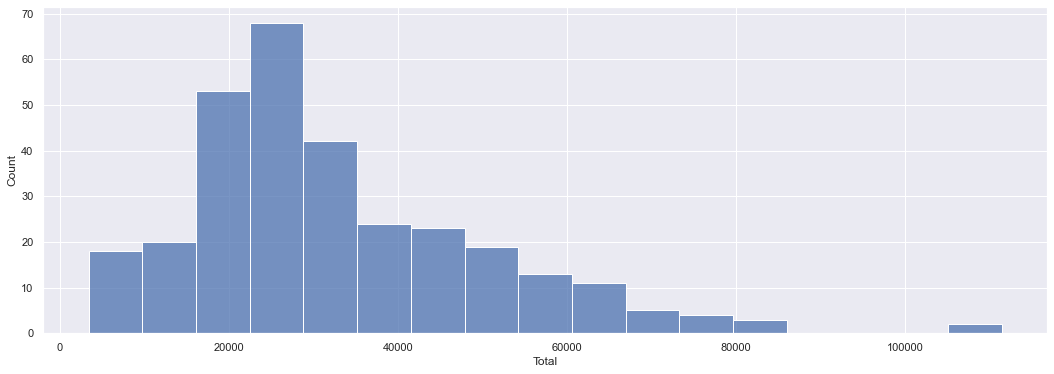

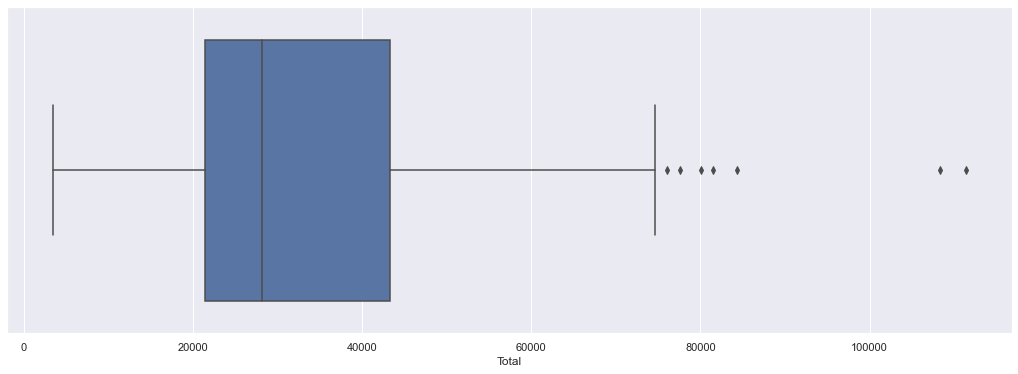

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


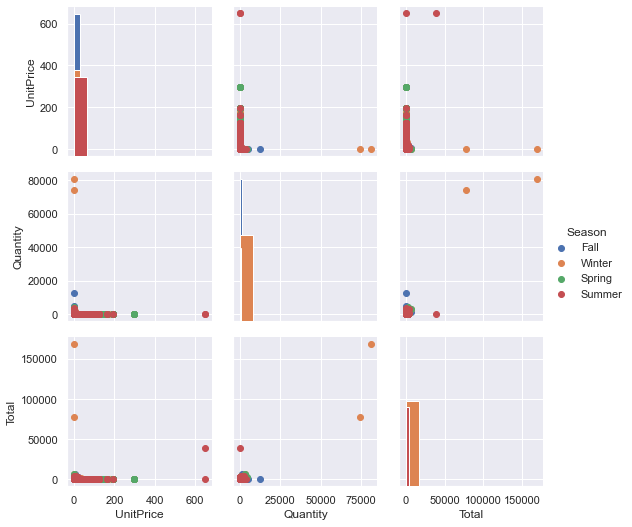

In [367]:
# plot histogram for total revenue by day
sns.histplot(data=total_tota, x='Total')
plt.show()

# plot boxplot for total revenue by day
sns.boxplot(data=total_tota, x='Total')
plt.show()

# create matrix to detect outliers in value based columns (Thanks to Michael Eibner)
matrix = sns.PairGrid(data = df_clean, vars=['UnitPrice', 'Quantity', 'Total'], hue='Season')
matrix.map_offdiag(plt.scatter)
matrix.map_diag(plt.hist)
matrix.add_legend();

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


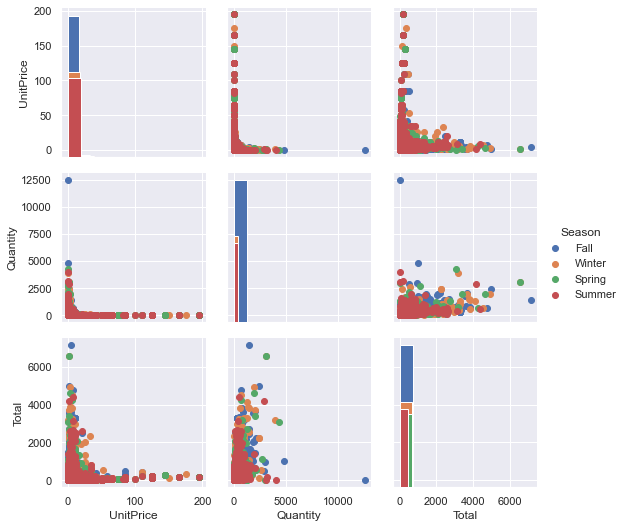

In [368]:
df_clean = df_clean[(df_clean['Total']<20000) & (df_clean['Quantity']<20000) & (df_clean['UnitPrice']<220)]

matrix = sns.PairGrid(data = df_clean, vars=['UnitPrice', 'Quantity', 'Total'], hue='Season')
matrix.map_offdiag(plt.scatter)
matrix.map_diag(plt.hist)
matrix.add_legend();

### There are some outliers which disturb the continuity of the dataset and therefore should be deleted.

## Analyze the revenue by season

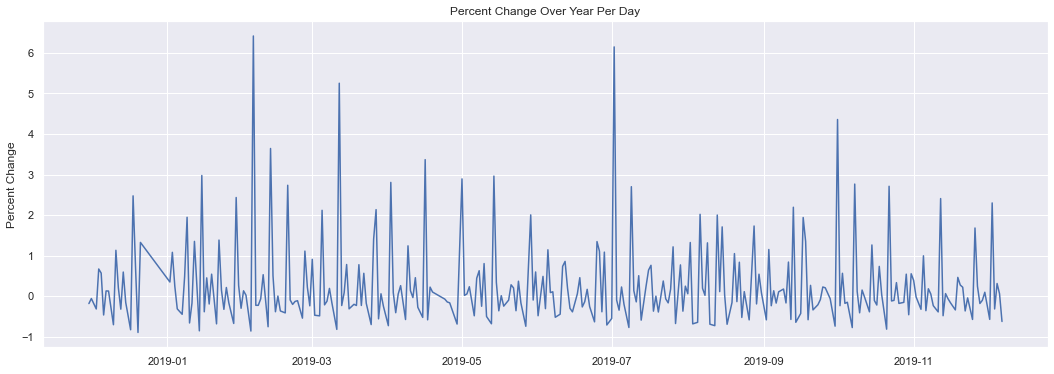

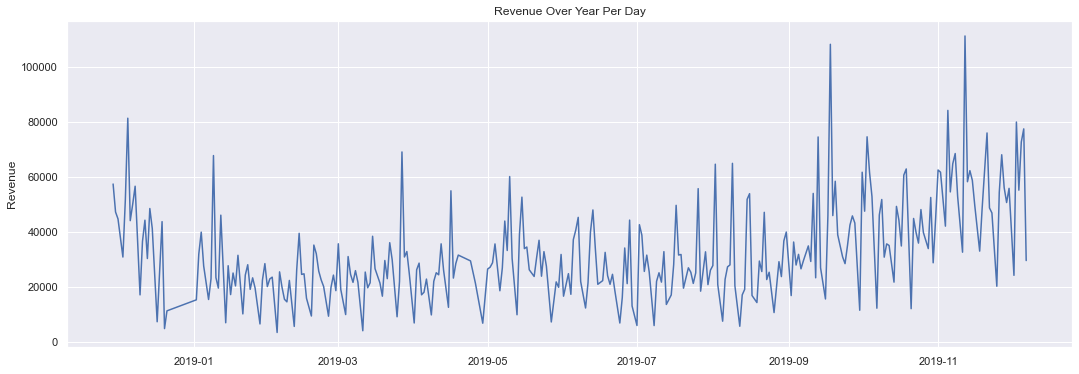

In [396]:
# show plot from percent change grouped by day
total_pct = df_clean.groupby('Day').agg({'Total':'sum'}).reset_index()
total_pct['pct_change'] = total_pct['Total'].pct_change()
plt.plot(total_pct['Day'], total_pct['pct_change'])
plt.ylabel("Percent Change")
plt.title("Percent Change Over Year Per Day")
plt.show()

# show plot from revenue grouped by day
total_tota = df_clean.groupby('Day').agg({'Total':'sum'}).reset_index()
plt.plot(total_tota['Day'], total_tota['Total'])
plt.ylabel("Revenue")
plt.title("Revenue Over Year Per Day")
plt.show()

In [392]:
total_pct.describe()

,Total,pct_change
count,305.000000,304.000000
mean,32678.781803,0.280491
std,17627.550935,1.044153
min,3439.670000,-0.889103
25%,21462.840000,-0.318166
50%,28167.140000,-0.003346
75%,43287.720000,0.496637
max,111398.610000,6.415961


In [370]:
# create dataframe with revenue by season
season_total = df_clean.groupby(['Season'])['Total'].sum().sort_values(ascending=False).to_frame()
season_total = season_total.reset_index()
season_total

,Season,Total
0,Fall,3721193.99
1,Winter,2154418.96
2,Summer,2137105.10
3,Spring,1954310.40


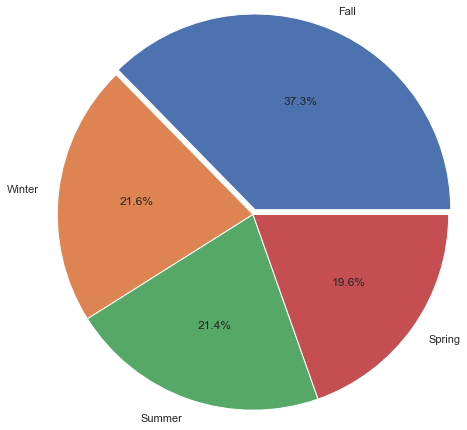

In [371]:
# plot pie for best selling seasons
labels = season_total['Season']
sizes = season_total['Total']
explode = [0.04, 0, 0, 0]
plt.pie(sizes,labels=labels, explode=explode, autopct='%1.1f%%', radius=1.5);

### Fall

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


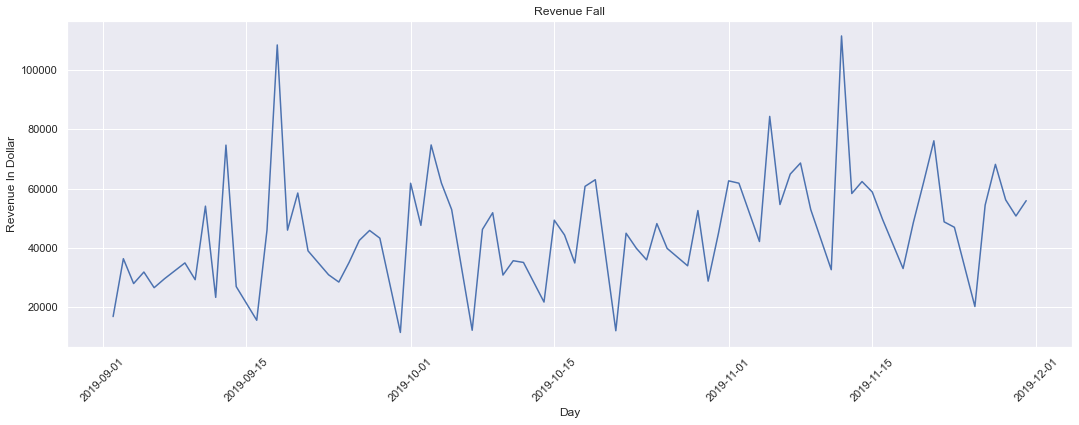

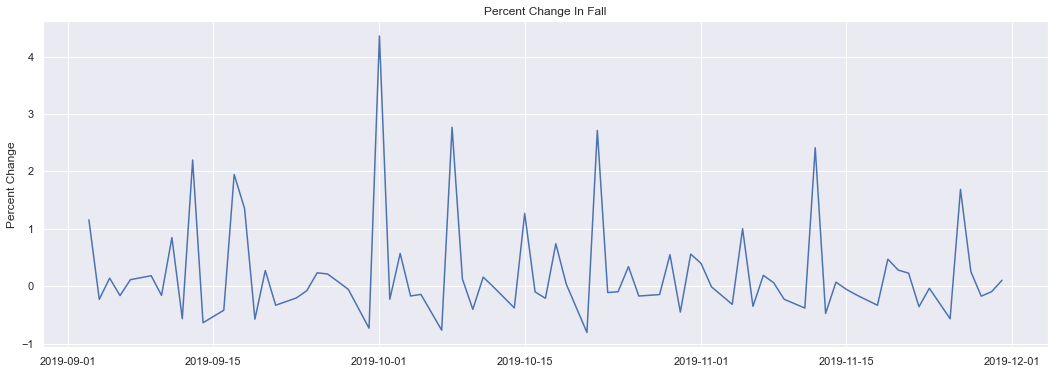

In [373]:
# plot total revenue in time for fall
season_fall = df_clean[(df_clean['Season'] == 'Fall') & (df_clean['Day'] > '2019-1-1') ]
season_fall = season_fall.groupby(['Day'])['Total'].sum().to_frame()
season_fall = season_fall.reset_index()
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(data=season_fall, x="Day", y="Total")
plt.xticks(rotation=45)
plt.ylabel("Revenue In Dollar")
plt.title("Revenue Fall")
plt.show();

# plot total percent change in time for fall
season_fall['pct_change'] = season_fall['Total'].pct_change()
plt.plot(season_fall['Day'], season_fall['pct_change'])
plt.ylabel("Percent Change")
plt.title("Percent Change In Fall")
plt.show();

In [374]:
season_fall.describe()

,Total,pct_change
count,78.000000,77.000000
mean,46364.105641,0.234811
std,19075.650859,0.898224
min,11531.560000,-0.807772
25%,33289.197500,-0.229640
50%,46013.270000,-0.037470
75%,57793.145000,0.279365
max,111398.610000,4.358016


### Winter

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


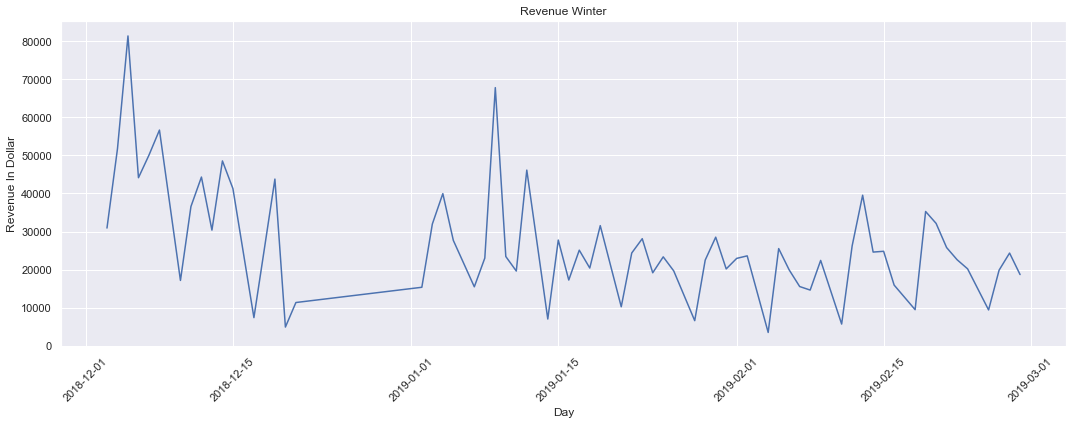

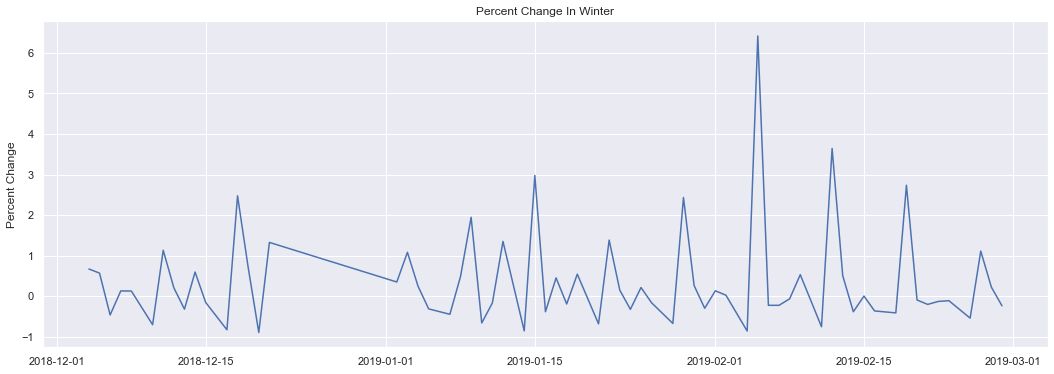

In [375]:
# plot total revenue in time for winter
season_winter = df_clean[(df_clean['Season'] == 'Winter') & (df_clean['Day'] > '2019-1-1') & (df_clean['Day'] <= '2019-03-31')]
season_winter_2018 = df_clean[(df_clean['Season'] == 'Winter') & (df_clean['Day'] > '2018-12-1') & (df_clean['Day'] <= '2018-12-31')]
season_winter = pd.concat([season_winter, season_winter_2018], ignore_index=True)
season_winter = season_winter.groupby(['Day'])['Total'].sum().to_frame()
season_winter = season_winter.reset_index()
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(data=season_winter, x="Day", y="Total")
plt.xticks(rotation=45)
plt.ylabel("Revenue In Dollar")
plt.title("Revenue Winter")
plt.show();

# plot total percent change in time for winter
season_winter['pct_change'] = season_winter['Total'].pct_change()
plt.plot(season_winter['Day'], season_winter['pct_change'])
plt.ylabel("Percent Change")
plt.title("Percent Change In Winter")
plt.show();

In [376]:
season_winter.describe()

,Total,pct_change
count,67.000000,66.000000
mean,26418.995970,0.368415
std,14829.584804,1.225894
min,3439.670000,-0.889103
25%,17950.435000,-0.317966
50%,23591.220000,0.018605
75%,31752.860000,0.566928
max,81454.990000,6.415961


### Spring

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


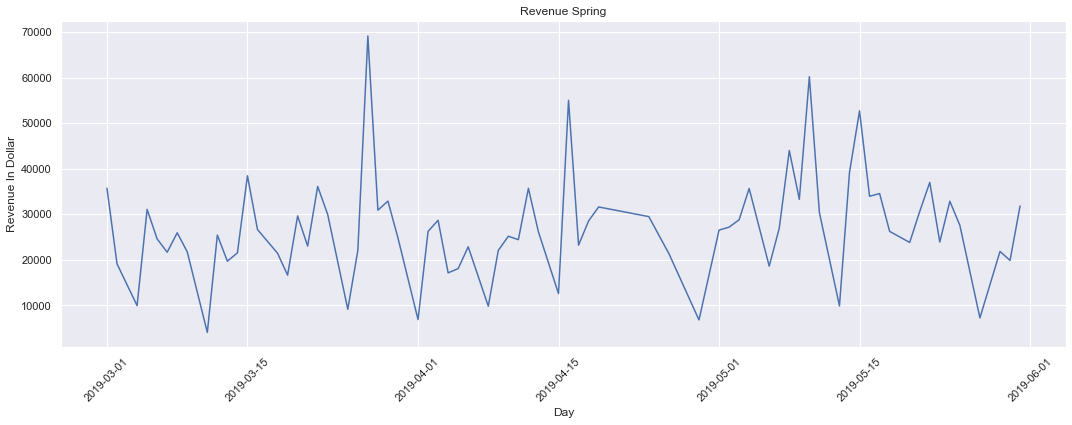

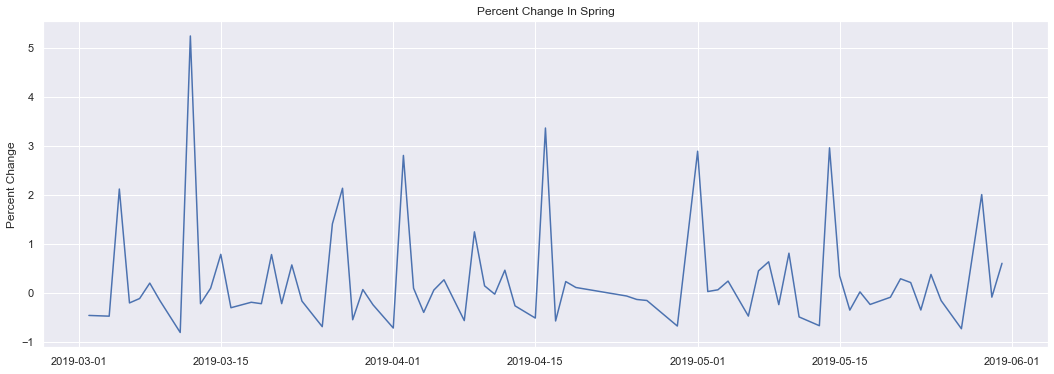

In [377]:
# plot total revenue in time for spring
season_spring = df_clean[(df_clean['Season'] == 'Spring') & (df_clean['Day'] > '2019-1-1') ]
season_spring = season_spring.groupby(['Day'])['Total'].sum().to_frame()
season_spring = season_spring.reset_index()
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(data=season_spring, x="Day", y="Total")
plt.xticks(rotation=45)
plt.ylabel("Revenue In Dollar")
plt.title("Revenue Spring")
plt.show();

# plot total percent change in time for spring
season_spring['pct_change'] = season_spring['Total'].pct_change()
plt.plot(season_spring['Day'], season_spring['pct_change'])
plt.ylabel("Percent Change")
plt.title("Percent Change In Spring")
plt.show();

In [378]:
season_spring.describe()

,Total,pct_change
count,73.000000,72.000000
mean,26771.375342,0.290972
std,11559.132771,1.094089
min,4069.140000,-0.813018
25%,21547.170000,-0.277789
50%,26138.690000,-0.048334
75%,31622.260000,0.392316
max,69168.510000,5.251881


### Summer

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


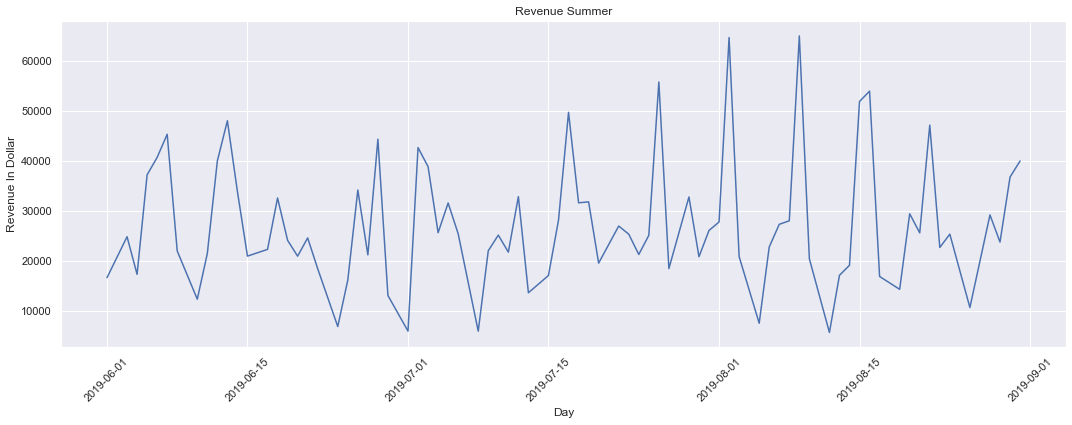

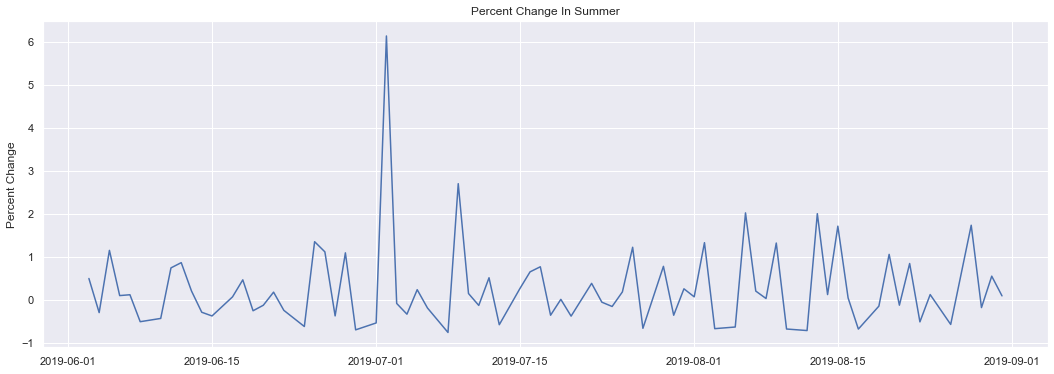

In [379]:
# plot total revenue in time for summer
season_sommer = df_clean[(df_clean['Season'] == 'Summer') & (df_clean['Day'] > '2019-1-1') ]
season_sommer = season_sommer.groupby(['Day'])['Total'].sum().to_frame()
season_sommer = season_sommer.reset_index()
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(data=season_sommer, x="Day", y="Total")
plt.xticks(rotation=45)
plt.ylabel("Revenue In Dollar")
plt.title("Revenue Summer")
plt.show();

# plot total percent change in time for summer
season_sommer['pct_change'] = season_sommer['Total'].pct_change()
plt.plot(season_sommer['Day'], season_sommer['pct_change'])
plt.ylabel("Percent Change")
plt.title("Percent Change In Summer")
plt.show;

In [380]:
season_sommer.describe()

,Total,pct_change
count,78.000000,77.000000
mean,27398.783333,0.278108
std,12951.564027,1.008441
min,5701.870000,-0.766072
25%,19792.017500,-0.363854
50%,25155.340000,0.064670
75%,32858.712500,0.647176
max,65024.620000,6.146590


In [381]:
# make dataframe with percent change between the seasons
season_total = df_clean.groupby(['Season'])['Total'].sum().to_frame()
season_total = season_total.reindex(['Spring', 'Summer', 'Fall', 'Winter'])
season_total['pct_change'] = season_total.pct_change()
season_total = season_total.reset_index()
season_total

,Season,Total,pct_change
0,Spring,1954310.40,NaN
1,Summer,2137105.10,0.093534
2,Fall,3721193.99,0.741231
3,Winter,2154418.96,-0.421041


In [382]:
season_total.describe()

,Total,pct_change
count,4.000000e+00,3.000000
mean,2.491757e+06,0.137908
std,8.246088e+05,0.582405
min,1.954310e+06,-0.421041
25%,2.091406e+06,-0.163753
50%,2.145762e+06,0.093534
75%,2.546113e+06,0.417383
max,3.721194e+06,0.741231


## Conclusion

It is clear to see how revenues and activities increase towards fall and level off towards spring after Christmas. The increase in the fall is associated with the Christmas business, which we want to confirm in the following analyses. Autumn is the most successful season in 2019 with 37.3% of total revenue and spring is the weakest season with 19.6%.

# Step 4 | Analysis of the product range and customers

### Find best selling products in seasons

In [383]:
# create dataframe with orders per seasons etc.
CrosstabResult = pd.crosstab(index=df_clean['Description'],columns=df_clean['Season'])
CrosstabResult['Count'] = CrosstabResult[['Fall', 'Spring', 'Summer', 'Winter']].sum(axis=1)
CrosstabResult_agg = df_clean.groupby(['Description']).agg({'Quantity':'sum', 'Total':'sum'})
CrosstabResult_agg_final = CrosstabResult.merge(CrosstabResult_agg, on='Description')
CrosstabResult_agg_final = CrosstabResult_agg_final.sort_values(by='Total', ascending=False).reset_index()
CrosstabResult_agg_final = CrosstabResult_agg_final.rename(columns={"Fall": "Fall_Orders", 
                                                                    "Spring": "Spring_Orders", 
                                                                    "Summer": "Summer_Orders", 
                                                                    "Winter": "Winter_Orders", 
                                                                    "Count": "Total_Orders",
                                                                    "Quantity": "Quantity_Items", 
                                                                    "Total": "Total_Revenue"})
CrosstabResult_agg_final.head(10)

,Description,Fall_Orders,Spring_Orders,Summer_Orders,Winter_Orders,Total_Orders,Quantity_Items,Total_Revenue
0,REGENCY CAKESTAND 3 TIER,550,560,417,482,2009,13862,174156.54
1,WHITE HANGING HEART T-LIGHT HOLDER,654,611,473,577,2315,37876,106236.72
2,PARTY BUNTING,327,603,548,222,1700,18287,99445.23
3,JUMBO BAG RED RETROSPOT,672,490,553,397,2112,48375,94159.81
4,RABBIT NIGHT LIGHT,648,100,182,87,1017,30739,66870.03
5,PAPER CHAIN KIT 50'S CHRISTMAS,852,11,76,245,1184,19329,64875.59
6,ASSORTED COLOUR BIRD ORNAMENT,525,382,302,267,1476,36362,58927.62
7,CHILLI LIGHTS,237,101,122,210,670,10305,54096.36
8,SPOTTY BUNTING,368,243,519,26,1156,8491,42513.48
9,JUMBO BAG PINK POLKADOT,354,307,356,215,1232,21448,42401.01


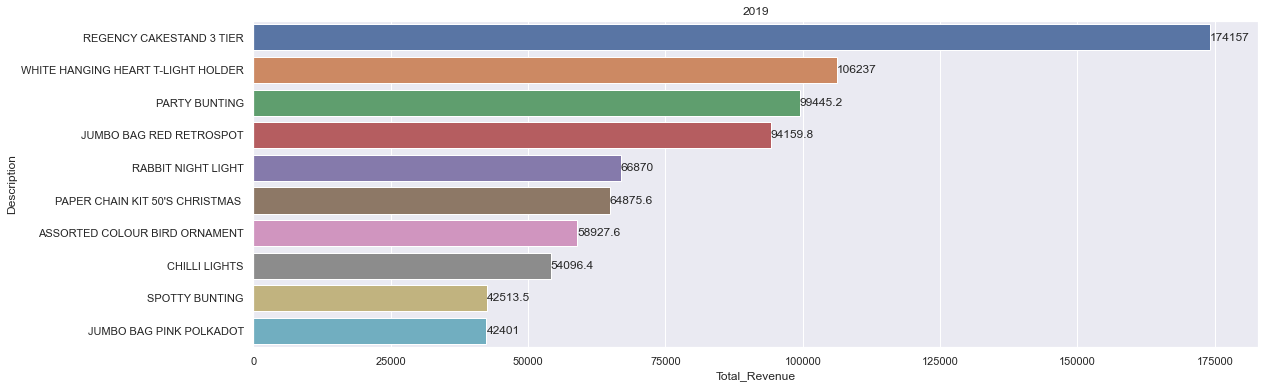

In [406]:
# create plot with best selling product in total
CrosstabResult_agg_final_10 = CrosstabResult_agg_final.head(10)
ax = sns.barplot(data=CrosstabResult_agg_final_10, x='Total_Revenue', y='Description');
plt.title("2019")
for i in ax.containers:
    ax.bar_label(i,)

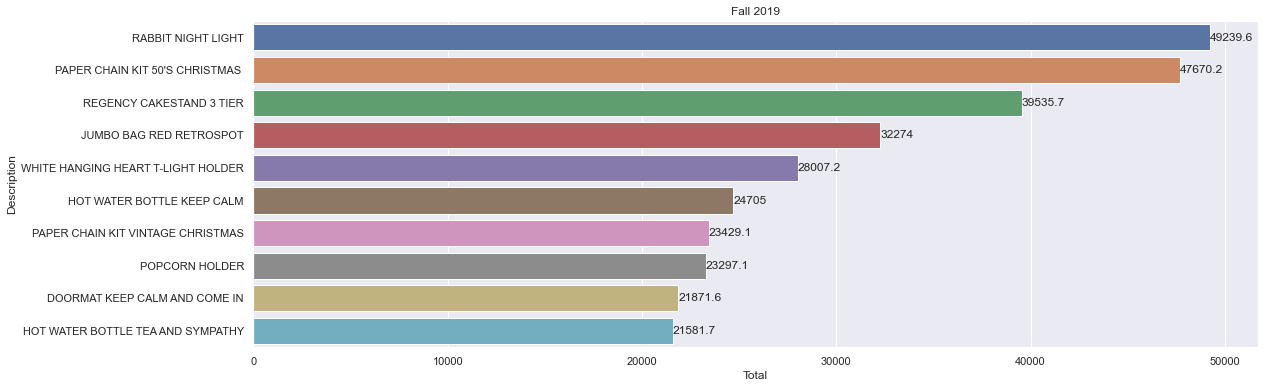

In [407]:
# create plot with best selling product for fall
Fall_Products = df_clean[df_clean['Season'] == 'Fall'].groupby(['Description', 'Season']).agg({'Quantity':'sum', 'Total':'sum'})
Fall_Products = Fall_Products.sort_values(by='Total', ascending=False).reset_index()
Fall_Prducts_10 = Fall_Products.head(10)
ax = sns.barplot(data=Fall_Prducts_10, x='Total', y='Description');
plt.title("Fall 2019")
for i in ax.containers:
    ax.bar_label(i,)

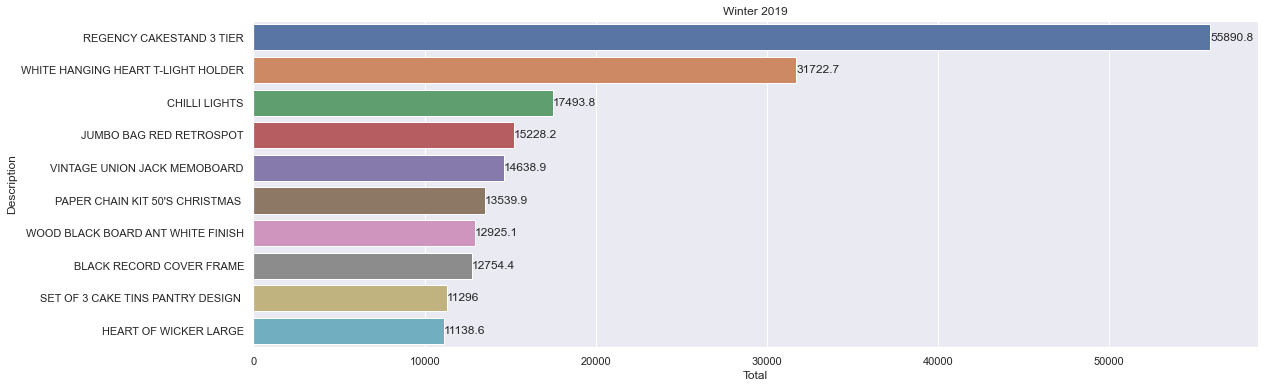

In [408]:
# create plot with best selling product for winter
Winter_Products = df_clean[df_clean['Season'] == 'Winter'].groupby(['Description', 'Season']).agg({'Quantity':'sum', 'Total':'sum'})
Winter_Products = Winter_Products.sort_values(by='Total', ascending=False).reset_index()
Winter_Products_10 = Winter_Products.head(10)
ax = sns.barplot(data=Winter_Products_10, x='Total', y='Description');
plt.title("Winter 2019")
for i in ax.containers:
    ax.bar_label(i,)

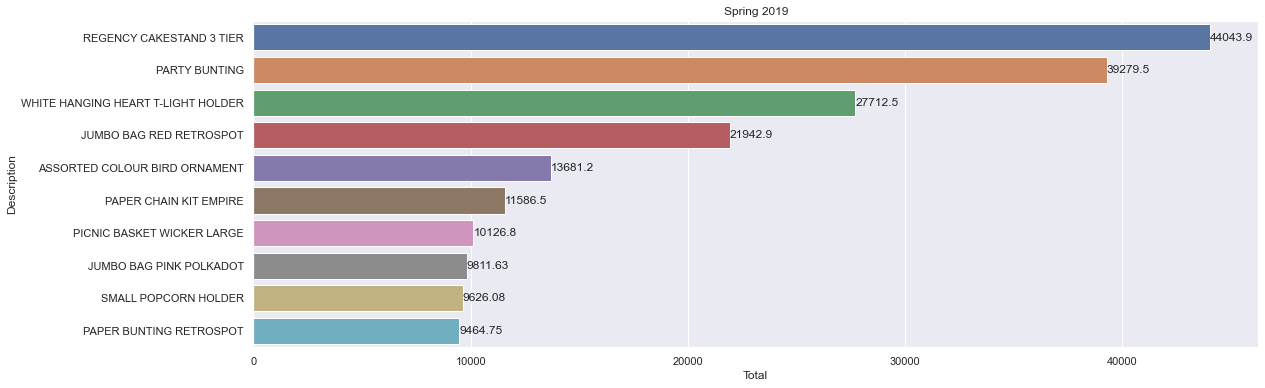

In [409]:
# create plot with best selling product for spring
Spring_Products = df_clean[df_clean['Season'] == 'Spring'].groupby(['Description', 'Season']).agg({'Quantity':'sum', 'Total':'sum'})
Spring_Products = Spring_Products.sort_values(by='Total', ascending=False).reset_index()
Spring_Products.head(10)
Spring_Products_10 = Spring_Products.head(10)
ax = sns.barplot(data=Spring_Products_10, x='Total', y='Description')
plt.title("Spring 2019")
for i in ax.containers:
    ax.bar_label(i,)

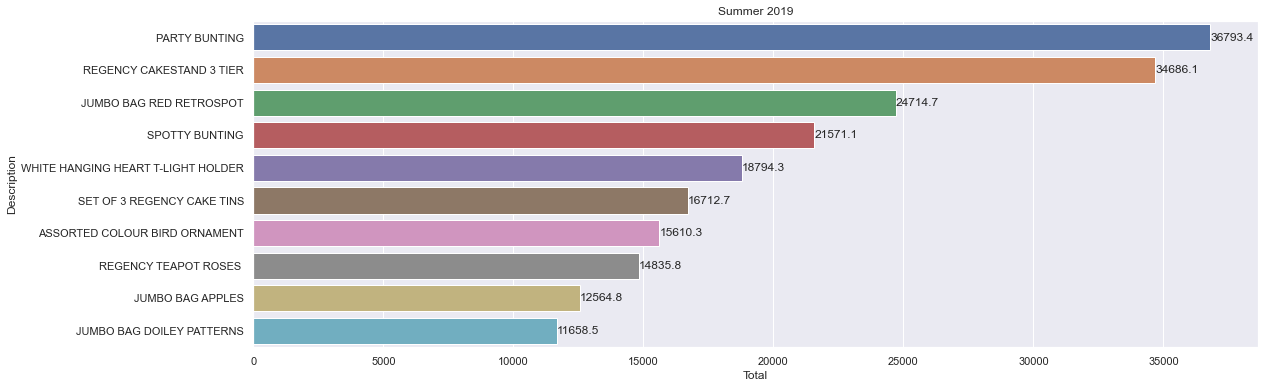

In [410]:
# create plot with best selling product for summer
Summer_Products = df_clean[df_clean['Season'] == 'Summer'].groupby(['Description', 'Season']).agg({'Quantity':'sum', 'Total':'sum'})
Summer_Products = Summer_Products.sort_values(by='Total', ascending=False).reset_index()
Summer_Products_10 = Summer_Products.head(10)
ax = sns.barplot(data=Summer_Products_10, x='Total', y='Description')
plt.title("Summer 2019")
for i in ax.containers:
    ax.bar_label(i,)

In [389]:
All = df_clean.copy()
Fall = df_clean[df_clean['Season']== 'Fall']
Spring = df_clean[df_clean['Season']== 'Spring']
Winter = df_clean[df_clean['Season']== 'Winter']
Summer = df_clean[df_clean['Season']== 'Summer']

In [397]:
# set lemmatize funktion 
def lemmatize (data):
    
    '''lemmatize a givin dataframe, return top 10 tokenized an lemmatized words'''
    
    data = data.dropna()
    wordnet_lemmatizer = WordNetLemmatizer()
    data['tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
    our_list = data["tokenized"].tolist()
    new_list = []
    for words in our_list:
        new_list += words
    lower_tokens = [t.lower() for t in new_list]
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    english_stops = set(stopwords.words('english'))
    no_stops = [t for t in alpha_only if t not in english_stops]
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    bow = Counter(lemmatized)
    return bow.most_common(10)

# Lemmatizing each segment, and general positive values data 
lem_Fall = lemmatize(Fall)
lem_Spring =lemmatize(Spring)
lem_Winter = lemmatize(Winter) 
lem_Summer = lemmatize(Summer)

/var/folders/38/m72flj3138q4g3bsrjdv7s5c0000gn/T/ipykernel_55965/1748164795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
/var/folders/38/m72flj3138q4g3bsrjdv7s5c0000gn/T/ipykernel_55965/1748164795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
/var/folders/38/m72flj3138q4g3bsrjdv7s5c0000gn/T/ipykernel_55965/174816479

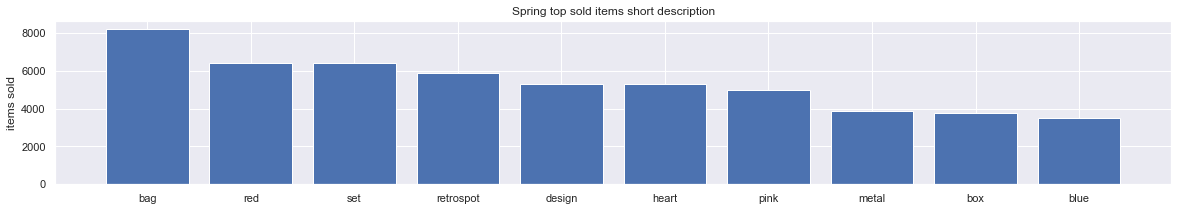

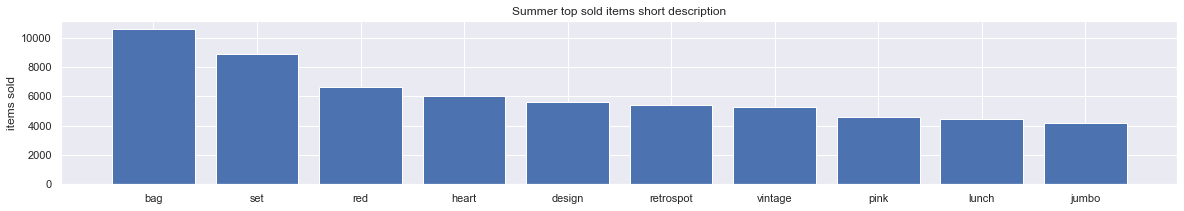

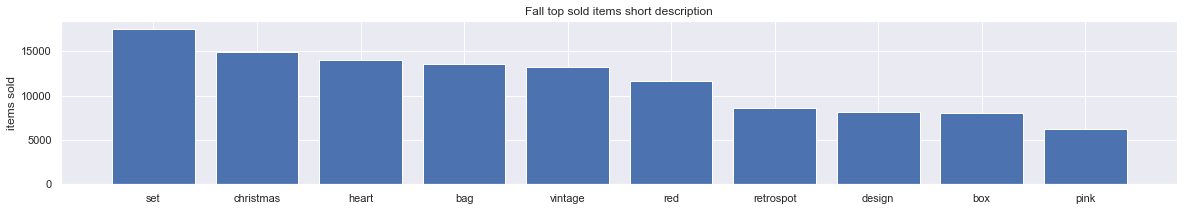

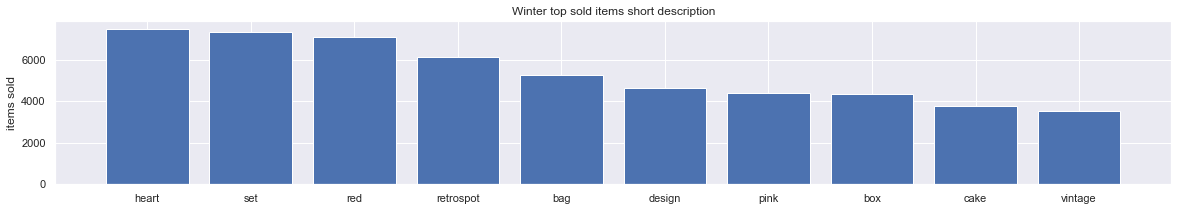

In [398]:
# defining a bar plotting funktion 
def most_used_words (data, name) : 
    
    ''' plots a barplot from a list of tuples on 1key,1value basis'''
    
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    plt.figure(figsize = (20,3))
    plt.bar (x= x , height= y )
    plt.ylabel('items sold')
    plt.title(name + ' top sold items short description')
    
# plot most used words for all positive data and  per segment
most_used_words(lem_Spring,'Spring')
most_used_words(lem_Summer,'Summer')
most_used_words(lem_Fall,'Fall')
most_used_words(lem_Winter,'Winter')

### Apriori Associations 

In [405]:
# create dataframe for apriori analyze
basket_fall = (df_clean[df_clean['Season'] == 'Fall'] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_fall

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,found box,had been put aside,michel oops,taig adjust,test,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
# encode datafram, fill  1 if found 
def hot_encode(x): 
    if x<= 0: 
        return 0
    if x>= 1: 
        return 1
    
# apply 1,0 if descriptiond found or not 
basket_fall_set  = basket_fall.applymap(hot_encode) 
basket_fall_set

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,found box,had been put aside,michel oops,taig adjust,test,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
# Building the model 
frq_items_fall = apriori(basket_fall_set, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe 
df_asso_fall = association_rules(frq_items_fall, metric ="lift", min_threshold = 0) 
df_asso_fall = df_asso_fall.sort_values(['confidence', 'lift'], ascending =[False, False])
df_asso_fall.reset_index(inplace= True, drop =True)
df_asso_fall[df_asso_fall['confidence'] > 0.5].head(10)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.033064,0.063147,0.030651,0.927039,14.680542,0.028563,12.840391
1,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.043565,0.063147,0.037037,0.850163,13.463141,0.034286,6.252473
2,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN ST...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.037037,0.062154,0.030651,0.827586,13.315068,0.028349,5.439506
3,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.062154,0.063147,0.049525,0.796804,12.618147,0.045600,4.610578
4,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.063147,0.062154,0.049525,0.784270,12.618147,0.045600,4.347306
5,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.043565,0.062154,0.033064,0.758958,12.210901,0.030356,3.890793
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.057046,0.061303,0.042004,0.736318,12.011194,0.038507,3.559965
7,(WOODEN TREE CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",0.043565,0.049525,0.030651,0.703583,14.206733,0.028494,3.206549
8,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.053782,0.066837,0.037463,0.696570,10.421928,0.033868,3.075381
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.083440,0.118632,0.057755,0.692177,5.834654,0.047856,2.863229


In [402]:
basket_winter = (df_clean[df_clean['Season'] == 'Winter'] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
    
# apply 1,0 if descriptiond found or not 
basket_winter_set  = basket_winter.applymap(hot_encode) 

# Building the model 
frq_items_winter = apriori(basket_winter_set, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe 
df_asso_winter = association_rules(frq_items_winter, metric ="lift", min_threshold = 0) 
df_asso_winter = df_asso_winter.sort_values(['confidence', 'lift'], ascending =[False, False])
df_asso_winter.reset_index(inplace= True, drop =True)
df_asso_winter[df_asso_winter['confidence'] > 0.5].head(10)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.057267,0.058229,0.043792,0.764706,13.132718,0.040458,4.002526
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.058229,0.057267,0.043792,0.752066,13.132718,0.040458,3.802358
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.057988,0.058229,0.039461,0.680498,11.686568,0.036084,2.947621
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.058229,0.057988,0.039461,0.677686,11.686568,0.036084,2.922651
4,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.059913,0.135226,0.039702,0.662651,4.900313,0.031600,2.563437
5,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.046198,0.061357,0.030077,0.651042,10.610703,0.027242,2.689842
6,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.069779,0.097209,0.044995,0.644828,6.633424,0.038212,2.541839
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.051732,0.095043,0.032483,0.627907,6.606535,0.027566,2.432071
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.078922,0.101299,0.048845,0.618902,6.109640,0.040850,2.358191
9,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.051973,0.059432,0.031761,0.611111,10.282501,0.028672,2.418603


In [403]:
basket_spring = (df_clean[df_clean['Season'] == 'Spring'] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
    
# apply 1,0 if descriptiond found or not 
basket_spring_set  = basket_spring.applymap(hot_encode) 

# Building the model 
frq_items_spring = apriori(basket_spring_set, min_support = 0.04, use_colnames = True)

# Collecting the inferred rules in a dataframe 
df_asso_spring = association_rules(frq_items_spring, metric ="lift", min_threshold = 0) 
df_asso_spring = df_asso_spring.sort_values(['confidence', 'lift'], ascending =[False, False])
df_asso_spring.reset_index(inplace= True, drop =True)
df_asso_spring[df_asso_spring['confidence'] > 0.5].head(10)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.045903,0.064723,0.042231,0.920000,14.214326,0.039260,11.690957
1,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.046592,0.068396,0.042231,0.906404,13.252356,0.039044,9.953457
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.054395,0.064723,0.046592,0.856540,13.233848,0.043071,6.519428
3,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.054395,0.068396,0.045903,0.843882,12.338232,0.042183,5.967303
4,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.051412,0.054395,0.042231,0.821429,15.101115,0.039434,5.295387
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.064723,0.068396,0.051412,0.794326,11.613689,0.046985,4.529524
6,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.054395,0.051412,0.042231,0.776371,15.101115,0.039434,4.241801
7,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.068396,0.064723,0.051412,0.751678,11.613689,0.046985,3.766384
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.064723,0.054395,0.046592,0.719858,13.233848,0.043071,3.375450
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.070232,0.111315,0.049805,0.709150,6.370656,0.041987,3.055478


In [404]:
basket_summer = (df_clean[df_clean['Season'] == 'Summer'] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
    
# apply 1,0 if descriptiond found or not 
basket_summer_set  = basket_summer.applymap(hot_encode) 

# Building the model 
frq_items_summer = apriori(basket_summer_set, min_support = 0.04, use_colnames = True)

# Collecting the inferred rules in a dataframe 
df_asso_summer = association_rules(frq_items_summer, metric ="lift", min_threshold = 0) 
df_asso_summer = df_asso_summer.sort_values(['confidence', 'lift'], ascending =[False, False])
df_asso_summer.reset_index(inplace= True, drop =True)
df_asso_summer[df_asso_summer['confidence'] > 0.5].head(10)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PEARS),(JUMBO BAG APPLES),0.054885,0.088135,0.040537,0.738589,8.380220,0.035700,3.488246
1,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.059895,0.071282,0.043270,0.722433,10.134841,0.039001,3.345929
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.079936,0.125256,0.054657,0.683761,5.458897,0.044645,2.766082
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.071282,0.059895,0.043270,0.607029,10.134841,0.039001,2.392299
4,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.069688,0.125256,0.041676,0.598039,4.774528,0.032947,2.176192
5,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.076748,0.125256,0.045320,0.590504,4.714373,0.035707,2.136150
6,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.086541,0.099749,0.051013,0.589474,5.909541,0.042381,2.192918
7,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.088135,0.125256,0.051241,0.581395,4.641649,0.040202,2.089666
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.084491,0.086541,0.046914,0.555256,6.416130,0.039602,2.053900
9,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.086541,0.084491,0.046914,0.542105,6.416130,0.039602,1.999387


## Colclusion

Most of the products which make the highest turnover are not dependent on the season in terms of design or purpose. You can find keywords like: bag, set, heart, vintage, sport etc. in every season. Nevertheless, the popularity of the products varies between the seasons and it is worth taking a closer look. In spring as well as in summer the color red is more popular than in autumn and winter. 

# Step 5 | Statistical Hypotheses
### Are certain products purchased at a certain time?
- Spring: retro products, products for Valentine's Day, products with the color red, bags for picnic etc.
- Summer: retro products, products with the color red, bags for picnic etc.
- Fall: most important time for Christmas market related products
- Winter: Products for spring, start the new year etc.

### Does it make sense to promote certain product groups at a certain time with more effort?
The most important time of the year is mid-autumn, here it is worth promoting the popular products for the upcoming Christmas. 37.2% of total sales are generated in the autumn season. It is important to consider not only products related to Christmas, but also products that do well throughout the year. 

The apriori research has shown that when a product in a certain color, size or shape has aroused interest, shopping cart suggestions of the same product in a different color, size and shape can be made at the same time.